# LAB 3B : Implement the Multiple Linear Regression

In [43]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
# import the dataset
dataset = pd.read_csv('Advertising Budget and Sales.csv')

## EDA Steps

In [45]:
dataset.head()

,Ranking,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [46]:
# Attributes in dataset
dataset.columns

Index(['Ranking', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [47]:
# info of dataset d
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ranking                  200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [48]:
# description of dataset
dataset.describe()

,Ranking,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Preprocessing Steps

### 1. Preparing Data as input and output

In [49]:
# Selecting data using iloc based on integer positions
X = dataset.iloc[:,:-1]

# Selecting data using loc based on labels
Y = dataset.iloc[:,-1]

In [50]:
print(X)

     Ranking  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)
0          1             230.1                 37.8                     69.2
1          2              44.5                 39.3                     45.1
2          3              17.2                 45.9                     69.3
3          4             151.5                 41.3                     58.5
4          5             180.8                 10.8                     58.4
..       ...               ...                  ...                      ...
195      196              38.2                  3.7                     13.8
196      197              94.2                  4.9                      8.1
197      198             177.0                  9.3                      6.4
198      199             283.6                 42.0                     66.2
199      200             232.1                  8.6                      8.7

[200 rows x 4 columns]


In [51]:
print(Y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales ($), Length: 200, dtype: float64


### 2. Splitting the dataset into the Training set and Test set

In [52]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split (X,Y, test_size = 0.2, random_state = 0)

### 3. Training the Multiple Linear Regression model on the Training set

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [28]:
# check th attribute of our model
print("Coefficient of our model", regressor.coef_)
print("intercept  of our model", regressor.intercept_)

Coefficient of our model [-0.00222187  0.0445384   0.1962548  -0.00319076]
intercept  of our model 3.2419693672141605


In [29]:
# score of our model 
print("Accuracy of our model", regressor.score(X_train, Y_train))

Accuracy of our model 0.9073274552252846


### 4. Predicting the Test set results

In [30]:
Y_pred = regressor.predict(X_test)
print(Y_test)
print(Y_pred)

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     14.9
159    12.9
60      8.1
123    15.2
179    12.6
185    22.6
122    11.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
Name: Sales ($), dtype: float64
[10.24664397  7.3067958   7.01313011 24.0629912  11.84538583  6.3623126
 12.97367539 15.01392577 10.95137181 16.2302401  22.94764396  9.07892877
 10.29830431 15.372556   11.63358138 12.38729183 18.91996453 10.72601207
 16.03372676 17.36589369 23.85225051  9.51048184 15.25366204 12.2528663
  5.81346738 15.19998588 12.12398331 20.74762723 13.36651757  9.16548788
 13.0430809  21.47977498 18.01828076 21.14170908  6.74096317  5.9527019
  7.82515133 13.21661502 14.72150697  6.18172688]


### Making a single prediction 
Ranking = 201, TV Ad Budget = 48, Radio Ad Budget = 90, Newspaper Ad Budget = 40

In [31]:
print(regressor.predict([[201, 48, 90, 40]]))

[22.46851911]


C:\Users\hrush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Variance score 

In [32]:
print('Variance score: {}'.format(regressor.score(X_test, Y_test))) 

Variance score: 0.8564802143279248


## Plot the Residual error 

### 1. Plotting Residual errors in training data

In [18]:
plt.style.use('fivethirtyeight') 

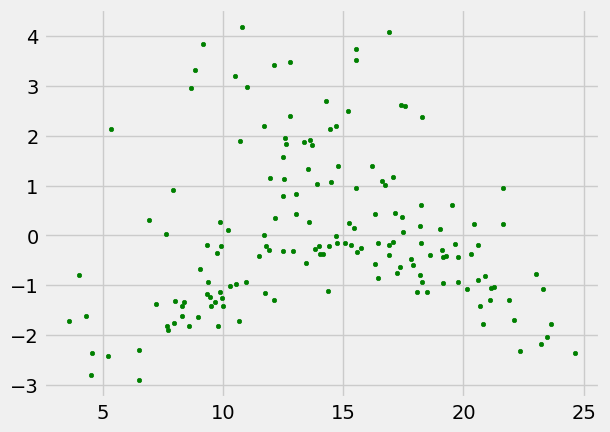

In [53]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - Y_train,color = "green", s = 10, label = 'Train data') 

### 2. Plotting residual errors in test data 

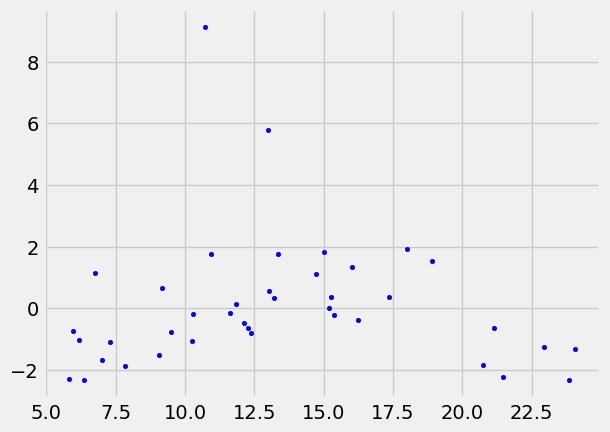

In [54]:
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - Y_test,color = "blue", s = 10, label = 'Test data') 

### 3. Plotting line for zero residual error 

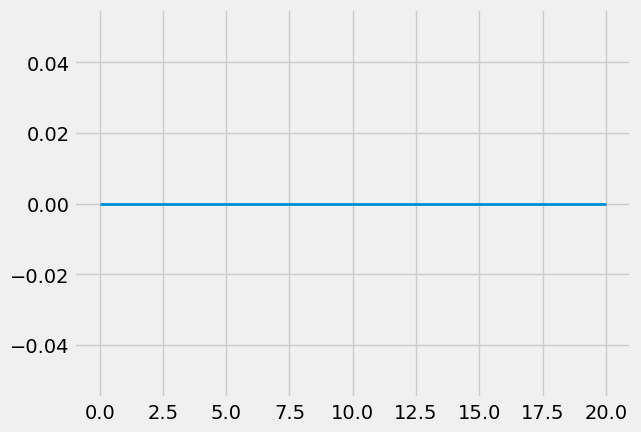

In [55]:
plt.hlines(y = 0, xmin = 0, xmax = 20, linewidth = 2) 

### 4. Plotting legend 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


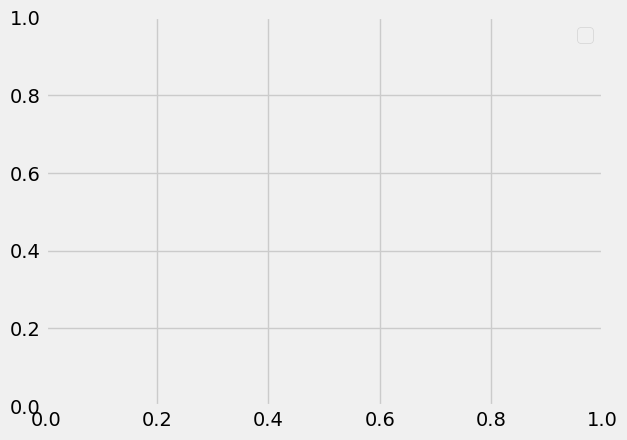

In [38]:
plt.legend(loc = 'upper right') 

### Function to show plot 

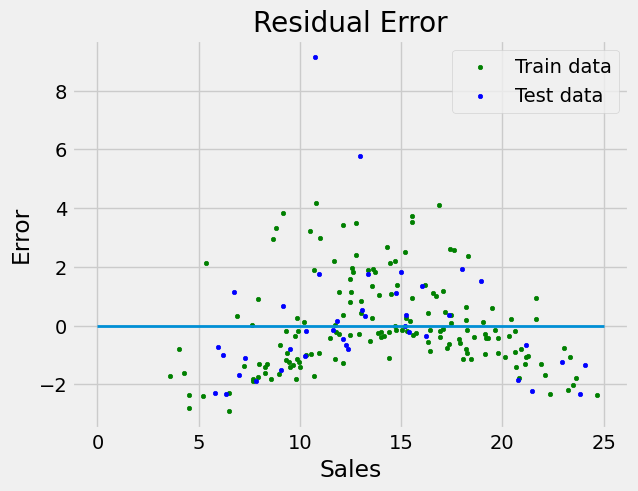

In [56]:
plt.title("Residual errors") 
plt.style.use('fivethirtyeight') 
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - Y_train,color = "green", s = 10, label = 'Train data') 
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - Y_test,color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 25, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual Error") 
plt.xlabel("Sales")
plt.ylabel("Error")
plt.show() 

### Evaluating a Model using R-Squared 

In [57]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,Y_pred))

0.8564802143279248
